In [1]:
import sys
import os
sys.path.append('/home/clarkmaio/workspace/pimpmyplot/')

import numpy as np
import matplotlib.pyplot as plt

import pimpmyplot as pmp



## Standard plot

Text(0.5, 1.0, 'Plot title')

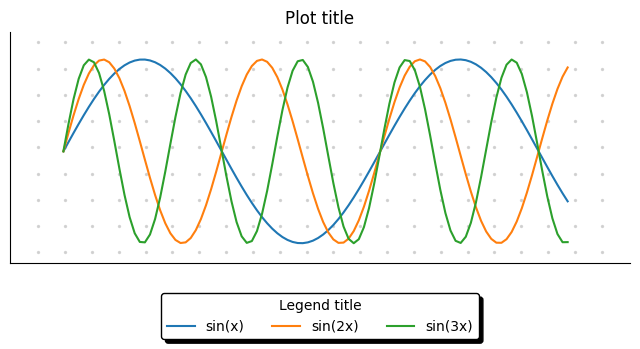

In [ ]:
x = np.linspace(0, 10, 100)

plt.figure(figsize=(8, 3))
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.sin(2*x), label='sin(2x)')
plt.plot(x, np.sin(3*x), label='sin(3x)')

pmp.bullet_grid(stepinch=.3)        # dotted grid similar to a bullet journal
pmp.remove_axis('top', 'right')     # remove axis in a simpler way
pmp.remove_ticks()                  # remove ticks in a simpler way
pmp.legend(loc='ext lower center', title='Legend title')                        # same as plt legend but better looking and horizontal labels as default
plt.title('Plot title')

## Subplots

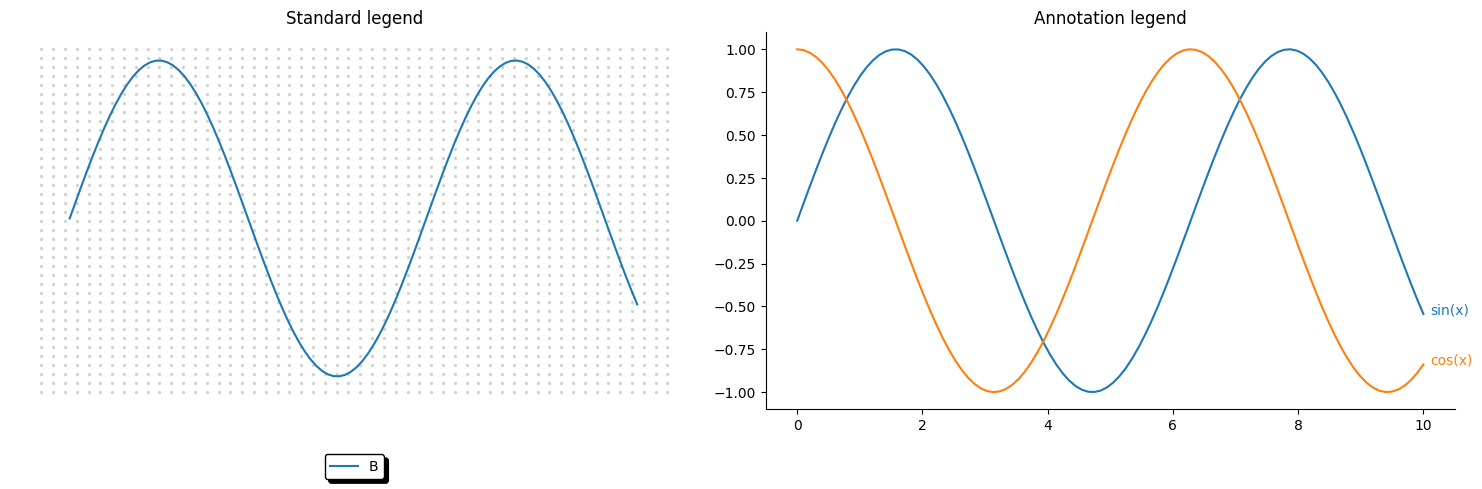

In [3]:
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.exp(x)/10000, np.sin(x), np.cos(x)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(x, y2, label='B')
ax[1].plot(x, y2, label='sin(x)')
ax[1].plot(x, y3, label='cos(x)')

pmp.bullet_grid(ax=ax[0], stepinch=.1)
pmp.legend(ax=ax[0], loc='ext lower center')
pmp.remove_axis(ax=ax[0])
pmp.remove_ticks(ax=ax[0])

pmp.annotation_legend(ax=ax[1], ha='left')
pmp.remove_axis('right', 'top', ax=ax[1])

ax[0].set_title('Standard legend')
ax[1].set_title('Annotation legend')

plt.tight_layout()

# Legend

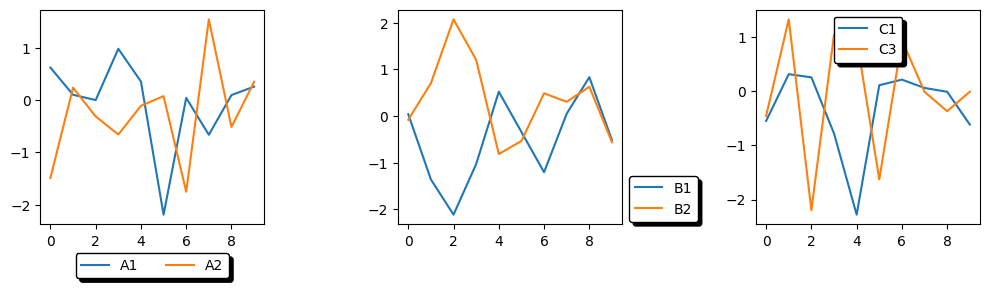

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].plot(np.random.randn(10), label='A1')
ax[0].plot(np.random.randn(10), label='A2')
pmp.legend(loc='ext lower center', ax=ax[0])

ax[1].plot(np.random.randn(10), label='B1')
ax[1].plot(np.random.randn(10), label='B2')
pmp.legend(loc='ext side lower right', ax=ax[1])

ax[2].plot(np.random.randn(10), label='C1')
ax[2].plot(np.random.randn(10), label='C3')
pmp.legend(loc='upper center', ax=ax[2], ncol=1)

plt.tight_layout()